In [73]:
import matplotlib.pyplot as plt
from iso3166 import countries
import seaborn as sns
import pandas as pd
import datetime
import folium
import math

In [75]:
world_filename = 'data/world-countries.json'
csv_filename2 = "data/PopTrendsBData2Live.csv"
df2 = pd.read_csv(csv_filename2)
csv_filename3 = "data/PopTrendsBData3Aggs.csv"
df3 = pd.read_csv(csv_filename3)

In [33]:
df3.head()

,UserID,CountryID,Gender,BirthYear,DateReg,TimeReg,Date1Dep,Date1Bet,Date1Spo,StakeF,...,StakeA,WinF,WinL,WinA,BetsF,BetsL,BetsA,DaysF,DaysL,DaysA
0,1324354,276,1,1963.0,2005-02-01,00:01,2005-02-24,2005-02-24,2005-02-24,15750.3800,...,17896.8500,15010.9000,1809.9500,16820.8500,727,71,798,231,33,233
1,1324355,300,1,1983.0,2005-02-01,00:05,2005-02-01,2005-02-01,2005-02-01,639.2998,...,663.9998,569.3700,11.2000,580.5700,286,21,307,99,7,101
2,1324356,276,1,1977.0,2005-02-01,00:05,2005-02-01,2005-02-02,2005-02-02,898.8100,...,1600.6300,336.3600,649.2700,985.6300,116,126,242,48,27,54
3,1324358,752,1,1981.0,2005-02-01,00:08,2005-02-01,2005-02-01,2005-02-01,247.6970,...,336.2897,153.8755,55.9819,209.8574,7,4,11,5,1,5
4,1324360,792,1,1978.0,2005-02-01,00:09,2005-02-02,2005-02-02,2005-02-02,685.9424,...,692.6065,623.8984,3.0528,626.9512,386,8,394,58,4,60


In [89]:
country_df = df3.groupby(["CountryID"]).mean().reset_index()
#TODO
country_df = country_df[country_df["CountryID"] != 530]
country_df = country_df[country_df["CountryID"] != 891]
country_df["CountryAlpha3Code"] = country_df.apply(lambda row: countries.get(int(row["CountryID"])).alpha3, axis = 1)
country_df = country_df[country_df["StakeL"] != 0]
country_df["ReturnPercent"] = country_df.apply(lambda row: row["WinA"]/row["StakeA"]*100, axis = 1)

In [90]:
day_df = df2.groupby(["DateBet"]).mean().reset_index()
def get_week(row):
    day = [int(x) for x in row["DateBet"].split('-')]
    return datetime.datetime(day[0], day[1], day[2]).weekday()
day_df['WeekDay'] =  day_df.apply(get_week, axis = 1)
week_df = day_df.groupby(["WeekDay"]).mean().reset_index()
week_df["ReturnPercent"] = week_df.apply(lambda row: row["WinL"]/row["StakeL"]*100, axis = 1)

In [130]:
day_df["ReturnSum"] = day_df.apply(lambda row: row["WinL"]/row["StakeL"]*100, axis = 1)
def get_week_number(row):
    day = [int(x) for x in row["DateBet"].split('-')]
    return str(day[0])+"-"+ str(datetime.date(day[0], day[1], day[2]).isocalendar()[1])
day_df["WeekNumber"] = day_df.apply(get_week_number, axis=1)
week_number_df = day_df.groupby("WeekNumber").mean().reset_index()

In [114]:
world_map_1 = folium.Map()

folium.Choropleth(
    geo_data=world_filename,
    name="choropleth",
    data=country_df,
    columns=['CountryAlpha3Code', 'ReturnPercent'],
    key_on="feature.id",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average percent of money received after bet",
).add_to(world_map_1)


folium.LayerControl().add_to(world_map_1)

world_map_1

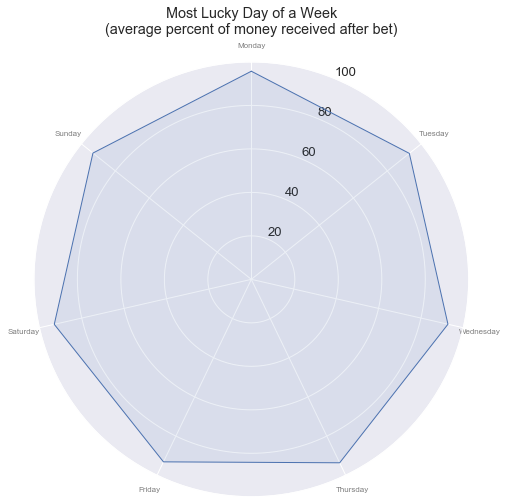

In [99]:
sns.set(rc = {'figure.figsize':(8,8)}, font_scale = 1.2)
angles = [n / 7 * 2 * math.pi for n in range(7)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(math.pi/2.0)
plt.xticks(angles[:-1], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday"], color='grey', size=8)
 
ax.plot(angles, [*week_df["ReturnPercent"], week_df["ReturnPercent"][0]], linewidth=1, linestyle='solid')
ax.fill(angles, [*week_df["ReturnPercent"], week_df["ReturnPercent"][0]], 'b', alpha=0.1)
ax.set(title="Most Lucky Day of a Week\n(average percent of money received after bet)", ylim=(0,100))
plt.show()

Text(0.5, 1.0, 'average percent of money received after bet')

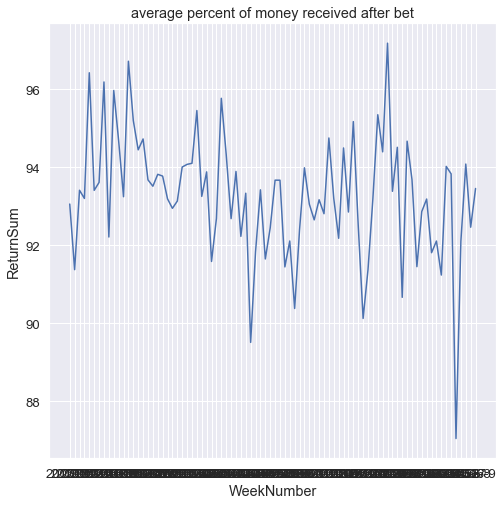

In [133]:
sns.lineplot(x=week_number_df["WeekNumber"], y=week_number_df["ReturnSum"]).set_title('Average percent of money received after bet')
plt.show()